# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

597

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL with Temperature (Celsius)
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [4]:
CityData=pd.DataFrame(columns=['City','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed','Country','Date'])
CityData['City']=cities

In [5]:
i=0
j=1

for index, row in CityData.iterrows():
    response=requests.get(query_url+row['City']).json()

    try:
        if i<49:
            i=i+1
        else:
            i=0
            j=j+1
        print(f'Processing Record {i} of set {j}|'+response['name'])
        CityData.loc[index,'Lat']=(response['coord']['lat'])
        CityData.loc[index,'Lng']=(response['coord']['lon'])
        CityData.loc[index,'Max Temp']=response['main']['temp_max']
        CityData.loc[index,'Humidity']=response['main']['humidity']
        CityData.loc[index,'Cloudiness']=response['clouds']['all']
        CityData.loc[index,'Wind Speed']=response['wind']['speed']
        CityData.loc[index,'Country']=response['sys']['country']
        CityData.loc[index,'Date']=response['dt']
    
    except (KeyError, IndexError):
        print("City not found/Data missing.....skipping.")
        i=i-1

        
print("-"*30)
print(f'Data Retrieval Complete  ')
print("-"*30)

Processing Record 1 of set 1|Pevek
Processing Record 2 of set 1|Zhigansk
City not found/Data missing.....skipping.
Processing Record 3 of set 1|Hermanus
Processing Record 4 of set 1|Qaanaaq
Processing Record 5 of set 1|Ushuaia
Processing Record 6 of set 1|Hilo
Processing Record 7 of set 1|Cape Town
Processing Record 8 of set 1|Mendeleyevsk
Processing Record 9 of set 1|Mayumba
Processing Record 10 of set 1|Anito
Processing Record 11 of set 1|Tuktoyaktuk
Processing Record 12 of set 1|Qaqortoq
Processing Record 13 of set 1|Atuona
Processing Record 14 of set 1|Kahului
Processing Record 15 of set 1|Kirs
Processing Record 16 of set 1|Beringovskiy
Processing Record 17 of set 1|New Norfolk
Processing Record 18 of set 1|Leningradskiy
Processing Record 19 of set 1|Busselton
City not found/Data missing.....skipping.
Processing Record 20 of set 1|Punta Arenas
Processing Record 21 of set 1|Pacific Grove
Processing Record 22 of set 1|Barrow
Processing Record 23 of set 1|Junqueirópolis
Processing Rec

Processing Record 44 of set 4|Vera Cruz
Processing Record 45 of set 4|Andenes
Processing Record 46 of set 4|Upata
Processing Record 47 of set 4|Adjumani
City not found/Data missing.....skipping.
Processing Record 48 of set 4|Jiayuguan City
Processing Record 49 of set 4|Pinega
Processing Record 0 of set 5|Sobreira
Processing Record 1 of set 5|Alofi
Processing Record 2 of set 5|Kindia
Processing Record 3 of set 5|Yulara
Processing Record 4 of set 5|Thinadhoo
Processing Record 5 of set 5|Kachīry
Processing Record 6 of set 5|Northam
Processing Record 7 of set 5|Barkly West
Processing Record 8 of set 5|Corrente
City not found/Data missing.....skipping.
Processing Record 9 of set 5|Mildura
City not found/Data missing.....skipping.
City not found/Data missing.....skipping.
Processing Record 10 of set 5|Mutoko
Processing Record 11 of set 5|Mehamn
Processing Record 12 of set 5|General Roca
Processing Record 13 of set 5|Abay
Processing Record 14 of set 5|Hualmay
Processing Record 15 of set 5|Kir

Processing Record 30 of set 8|Hamilton
Processing Record 31 of set 8|Port Moresby
Processing Record 32 of set 8|Tandil
Processing Record 33 of set 8|Banff
Processing Record 34 of set 8|Tiznit Province
Processing Record 35 of set 8|Baicheng
Processing Record 36 of set 8|Tiarei
Processing Record 37 of set 8|Santa Isabel
Processing Record 38 of set 8|Sitka
Processing Record 39 of set 8|Chimbarongo
Processing Record 40 of set 8|Qui Nhon
Processing Record 41 of set 8|Nanortalik
Processing Record 42 of set 8|Requena
Processing Record 43 of set 8|Inuvik
Processing Record 44 of set 8|Ixtapa
Processing Record 45 of set 8|Osterburg
Processing Record 46 of set 8|Belyy Yar
Processing Record 47 of set 8|Barabinsk
Processing Record 48 of set 8|Padang
Processing Record 49 of set 8|Hellvik
Processing Record 0 of set 9|Jérémie
Processing Record 1 of set 9|Dubbo
Processing Record 2 of set 9|Kyzyl-Suu
Processing Record 3 of set 9|Golčův Jeníkov
Processing Record 4 of set 9|Dumas
Processing Record 5 of se

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
CityData=CityData.dropna(how='any')
CityData=((CityData.reset_index(drop=True)).reset_index()).rename(columns={'index':'City ID'})
CityData.to_csv('Output Data/CityData.csv',encoding='utf-8',index=False)
CityData

,City ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,pevek,69.7008,170.313,0.57,90,100,3.36,RU,1659944642
1,1,zhigansk,66.7697,123.371,16.06,63,100,5.2,RU,1659944643
2,2,hermanus,-34.4187,19.2345,13.78,75,40,1.11,ZA,1659944645
3,3,qaanaaq,77.484,-69.3632,1.97,61,94,2.6,GL,1659944645
4,4,ushuaia,-54.8,-68.3,0.81,64,20,0.51,AR,1659944646
...,...,...,...,...,...,...,...,...,...,...
546,546,vieques,18.425,-65.8329,28.01,78,40,5.66,PR,1659945225
547,547,vallenar,-28.5708,-70.7581,12.56,46,87,2.31,CL,1659945226
548,548,tartus,34.889,35.8866,28.39,59,0,5.57,SY,1659945227
549,549,salinas,36.6777,-121.656,17.29,79,0,3.09,US,1659945082


In [7]:
CityData['City ID']=CityData['City ID'].astype(object)
CityData['Lat']=CityData['Lat'].astype(float)
CityData['Lng']=CityData['Lng'].astype(float)
CityData['Max Temp']=CityData['Max Temp'].astype(float)
CityData['Humidity']=CityData['Humidity'].astype(float)
CityData['Cloudiness']=CityData['Cloudiness'].astype(float)
CityData['Wind Speed']=CityData['Wind Speed'].astype(float)
CityData['Date']=CityData['Date'].astype(float)

CityData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551 entries, 0 to 550
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City ID     551 non-null    object 
 1   City        551 non-null    object 
 2   Lat         551 non-null    float64
 3   Lng         551 non-null    float64
 4   Max Temp    551 non-null    float64
 5   Humidity    551 non-null    float64
 6   Cloudiness  551 non-null    float64
 7   Wind Speed  551 non-null    float64
 8   Country     551 non-null    object 
 9   Date        551 non-null    float64
dtypes: float64(7), object(3)
memory usage: 43.2+ KB


In [8]:
CityData.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,5.510000e+02
mean,19.769313,14.215987,21.260309,68.972777,53.680581,3.610780,1.659945e+09
std,33.732129,88.648614,8.275342,22.115917,39.859704,2.566738,1.849612e+02
min,-54.800000,-179.166700,0.060000,9.000000,0.000000,0.000000,1.659944e+09
25%,-9.005950,-61.643400,15.540000,54.000000,9.000000,1.680000,1.659945e+09
50%,22.075200,19.234500,23.030000,73.000000,61.000000,3.000000,1.659945e+09
75%,49.799850,90.360050,27.060000,87.000000,97.000000,5.010000,1.659945e+09
max,78.218600,179.316700,43.060000,100.000000,100.000000,16.080000,1.659945e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
#  Get the indices of cities that have humidity over 100%.
Inspect=CityData.loc[CityData['Humidity']>100,'City ID']
Inspect

Series([], Name: City ID, dtype: object)

In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data=CityData.drop(Inspect)
clean_city_data

,City ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,pevek,69.7008,170.3133,0.57,90.0,100.0,3.36,RU,1.659945e+09
1,1,zhigansk,66.7697,123.3711,16.06,63.0,100.0,5.20,RU,1.659945e+09
2,2,hermanus,-34.4187,19.2345,13.78,75.0,40.0,1.11,ZA,1.659945e+09
3,3,qaanaaq,77.4840,-69.3632,1.97,61.0,94.0,2.60,GL,1.659945e+09
4,4,ushuaia,-54.8000,-68.3000,0.81,64.0,20.0,0.51,AR,1.659945e+09
...,...,...,...,...,...,...,...,...,...,...
546,546,vieques,18.4250,-65.8329,28.01,78.0,40.0,5.66,PR,1.659945e+09
547,547,vallenar,-28.5708,-70.7581,12.56,46.0,87.0,2.31,CL,1.659945e+09
548,548,tartus,34.8890,35.8866,28.39,59.0,0.0,5.57,SY,1.659945e+09
549,549,salinas,36.6777,-121.6555,17.29,79.0,0.0,3.09,US,1.659945e+09


## Plotting the Data
* Use proper labelling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [11]:
Lat=clean_city_data['Lat']
MaxT=clean_city_data['Max Temp']
time=pd.to_datetime('today').strftime('%d/%m/%y')


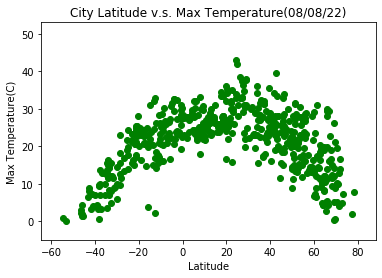

In [12]:
plt.scatter(Lat,MaxT,facecolor='green')
plt.title('City Latitude v.s. Max Temperature('+time+')')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(C)')
plt.xlim(min(Lat)-10,max(Lat)+10)
plt.ylim(min(MaxT)-5,max(MaxT)+10)


plt.savefig('Output Data/LatMaxt.png',encoding='utf-8');

In [13]:
#The picture above shows two indications. One is that the maximum of cities' temperature is vary with their latitude. 
#Another point is we can find most of the people's active regions are in the Northern hemisphere as there is no city
#in between 60 to 80 southern latitude while there are some cities still in between 60 to 80 northern latitude.

## Latitude vs. Humidity Plot

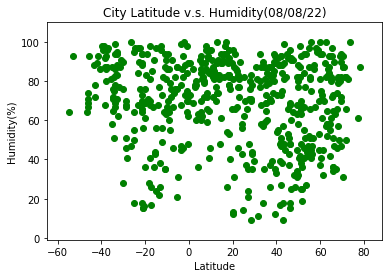

In [14]:
Lat=clean_city_data['Lat']
Humidity=clean_city_data['Humidity']


plt.scatter(Lat,Humidity,facecolor='green')
plt.title('City Latitude v.s. Humidity('+time+')')
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.xlim(min(Lat)-10,max(Lat)+10)
plt.ylim(min(Humidity)-10,max(Humidity)+10)


plt.savefig('Output Data/LatHumi.png',encoding='utf-8');

In [15]:
# The picture above shows two indications. One is that cities' humidity is not highly related with 
# their latitude. Another point is that the humidity in the range between 20 to 50 northern latitude 
# and the range between 0 to 20 southern latitude are unstable. Based on the second point, we could
# find out that those ranges match with the distribution of globe land and help us to conclude that 
# the ocean could stabilize the climate change.

## Latitude vs. Cloudiness Plot

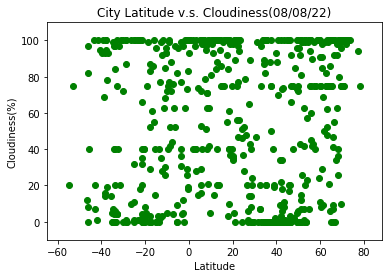

In [16]:
Lat=clean_city_data['Lat']
Cloudiness=clean_city_data['Cloudiness']


plt.scatter(Lat,Cloudiness,facecolor='green')
plt.title('City Latitude v.s. Cloudiness('+time+')')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.xlim(min(Lat)-10,max(Lat)+10)
plt.ylim(min(Cloudiness)-10,max(Cloudiness)+10)

plt.savefig('Output Data/LatCloud.png',encoding='utf-8');

In [17]:
# The picture above shows that cities' cloudness is not related with their latitude.

## Latitude vs. Wind Speed Plot

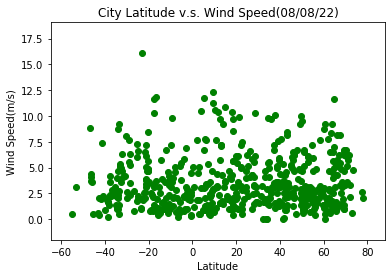

In [18]:
Lat=clean_city_data['Lat']
WindSpeed=clean_city_data['Wind Speed']

plt.scatter(Lat,WindSpeed,facecolor='green')
plt.title('City Latitude v.s. Wind Speed('+time+')')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(m/s)')
plt.xlim(min(Lat)-10,max(Lat)+10)
plt.ylim(-2,max(WindSpeed)+3)

plt.savefig('Output Data/LatWindSd.png',encoding='utf-8');

In [19]:
# The picture above shows that cities' Wind Speed is not related with their latitude. 
# The city data with 17.5(mph)wind speed might be a outlier. We need more detial of that city to make a clear conclusion.  

## Linear Regression

###  Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

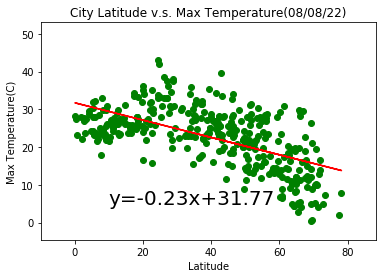

In [20]:
#base plot
NorthHemi=clean_city_data.loc[(0<clean_city_data['Lat'])&(clean_city_data['Lat']<=90)]
Lat_N=NorthHemi['Lat']
MaxT=NorthHemi['Max Temp']

#regression
(slope,intercept,rvalue,pvalue,stderr)=linregress(Lat_N,MaxT)
Line_eq='y='+str(round(slope,2))+'x+'+str(round(intercept,2))
regress_value=slope*Lat_N+intercept

#plot
plt.scatter(Lat_N,MaxT,facecolor='green')
plt.plot(Lat_N,regress_value,color='red',linewidth=1.5)
plt.annotate(Line_eq,xy=(10,5),fontsize=20)
plt.title('City Latitude v.s. Max Temperature('+time+')')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(C)')
plt.xlim(min(Lat_N)-10,max(Lat_N)+10)
plt.ylim(min(MaxT)-5,max(MaxT)+10);

In [21]:
print(f'The r-value is: {rvalue}')

The r-value is: -0.6059286604035652


In [22]:
#1.The r-value indicates that the correlation is moderate inverse relationship.
#2.It matches the conclusion from Latitude vs. Temperature Plot.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

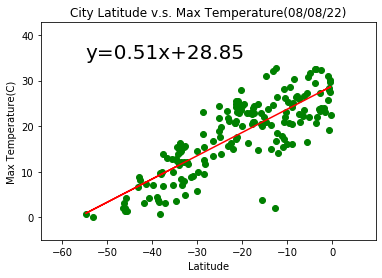

In [23]:
#base plot
SouthHemi=clean_city_data.loc[(clean_city_data['Lat']<0)&(-90<=clean_city_data['Lat'])]
Lat_S=SouthHemi['Lat']
MaxT=SouthHemi['Max Temp']

#regression
(slope,intercept,rvalue,pvalue,stderr)=linregress(Lat_S,MaxT)
Line_eq='y='+str(round(slope,2))+'x+'+str(round(intercept,2))
regress_value=slope*Lat_S+intercept

#plot
plt.scatter(Lat_S,MaxT,facecolor='green')
plt.plot(Lat_S,regress_value,color='red',linewidth=1.5)
plt.annotate(Line_eq,xy=(-55,35),fontsize=20)
plt.title('City Latitude v.s. Max Temperature('+time+')')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(C)')
plt.xlim(min(Lat_S)-10,max(Lat_S)+10)
plt.ylim(min(MaxT)-5,max(MaxT)+10);

In [24]:
print(f'The r-value is: {rvalue}')

The r-value is: 0.8155814282093319


In [25]:
#1.The r-value indicates that the correlation is strong direct relationship.
#2.Because the ratio of ocean/land in the Southern hemisphere is higher than the Northern hemisphere's one, 
#the correlation is stronger compared to the previous plot.
#3.It matches the conclusion from Latitude vs. Temperature Plot.

### Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

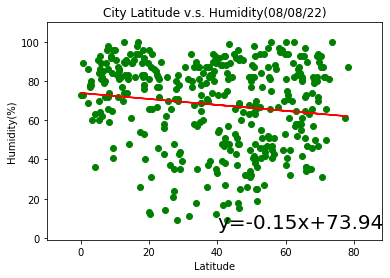

In [26]:
#base plot
Humidity=NorthHemi['Humidity']

#regression
(slope,intercept,rvalue,pvalue,stderr)=linregress(Lat_N,Humidity)
Line_eq='y='+str(round(slope,2))+'x+'+str(round(intercept,2))
regress_value=slope*Lat_N+intercept

#plot
plt.scatter(Lat_N,Humidity,facecolor='green')
plt.plot(Lat_N,regress_value,color='red',linewidth=1.5)
plt.annotate(Line_eq,xy=(40,5),fontsize=20)
plt.title('City Latitude v.s. Humidity('+time+')')
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.xlim(min(Lat_N)-10,max(Lat_N)+10)
plt.ylim(min(Humidity)-10,max(Humidity)+10);

In [27]:
print(f'The r-value is: {rvalue}')

The r-value is: -0.14035503821293271


In [28]:
#1.The r-value indicates that the correlation is none.
#2.It matches the conclusion from Latitude vs. Humidity Plot.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

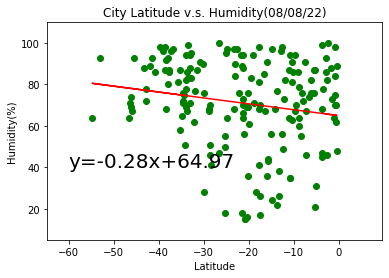

In [29]:
#base plot
Humidity=SouthHemi['Humidity']

#regression
(slope,intercept,rvalue,pvalue,stderr)=linregress(Lat_S,Humidity)
Line_eq='y='+str(round(slope,2))+'x+'+str(round(intercept,2))
regress_value=slope*Lat_S+intercept

#plot
plt.scatter(Lat_S,Humidity,facecolor='green')
plt.plot(Lat_S,regress_value,color='red',linewidth=1.5)
plt.annotate(Line_eq,xy=(-60,40),fontsize=20)
plt.title('City Latitude v.s. Humidity('+time+')')
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.xlim(min(Lat_S)-10,max(Lat_S)+10)
plt.ylim(min(Humidity)-10,max(Humidity)+10);

In [30]:
print(f'The r-value is: {rvalue}')

The r-value is: -0.17430960064317252


In [31]:
#1.The r-value indicates that the correlation is none.
#2.It matches the conclusion from Latitude vs. Humidity Plot.

### Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

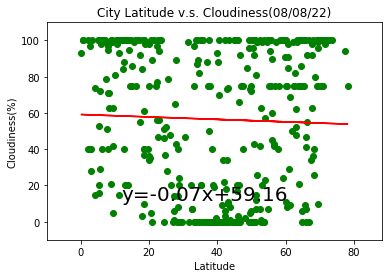

In [32]:
#base plot
Cloudiness=NorthHemi['Cloudiness']

#regression
(slope,intercept,rvalue,pvalue,stderr)=linregress(Lat_N,Cloudiness)
Line_eq='y='+str(round(slope,2))+'x+'+str(round(intercept,2))
regress_value=slope*Lat_N+intercept

#plot
plt.scatter(Lat_N,Cloudiness,facecolor='green')
plt.plot(Lat_N,regress_value,color='red',linewidth=1.5)
plt.annotate(Line_eq,xy=(12,12),fontsize=20)
plt.title('City Latitude v.s. Cloudiness('+time+')')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.xlim(min(Lat_N)-10,max(Lat_N)+10)
plt.ylim(min(Cloudiness)-10,max(Cloudiness)+10);

In [33]:
print(f'The r-value is: {rvalue}')

The r-value is: -0.03519669420721991


In [34]:
#1.The r-value indicates that the correlation is none.
#2.It matches the conclusion from Latitude vs. cloudness Plot.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

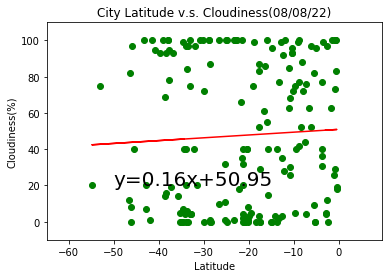

In [35]:
#base plot
Cloudiness=SouthHemi['Cloudiness']

#regression
(slope,intercept,rvalue,pvalue,stderr)=linregress(Lat_S,Cloudiness)
Line_eq='y='+str(round(slope,2))+'x+'+str(round(intercept,2))
regress_value=slope*Lat_S+intercept

#plot
plt.scatter(Lat_S,Cloudiness,facecolor='green')
plt.plot(Lat_S,regress_value,color='red',linewidth=1.5)
plt.annotate(Line_eq,xy=(-50,20),fontsize=20)
plt.title('City Latitude v.s. Cloudiness('+time+')')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.xlim(min(Lat_S)-10,max(Lat_S)+10)
plt.ylim(min(Cloudiness)-10,max(Cloudiness)+10);

In [36]:
print(f'The r-value is: {rvalue}')

The r-value is: 0.05170092801242171


In [37]:
#1.The r-value indicates that the correlation is none.
#2.It matches the conclusion from Latitude vs. cloudness Plot.

### Wind Speed (m/s) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

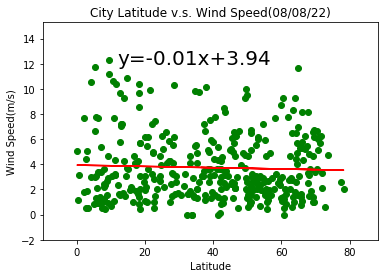

In [38]:
#base plot
WindSpeed=NorthHemi['Wind Speed']

#regression
(slope,intercept,rvalue,pvalue,stderr)=linregress(Lat_N,WindSpeed)
Line_eq='y='+str(round(slope,2))+'x+'+str(round(intercept,2))
regress_value=slope*Lat_N+intercept

#plot
plt.scatter(Lat_N,WindSpeed,facecolor='green')
plt.plot(Lat_N,regress_value,color='red',linewidth=1.5)
plt.annotate(Line_eq,xy=(12,12),fontsize=20)
plt.title('City Latitude v.s. Wind Speed('+time+')')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(m/s)')
plt.xlim(min(Lat_N)-10,max(Lat_N)+10)
plt.ylim(-2,max(WindSpeed)+3);

In [39]:
print(f'The r-value is: {rvalue}')

The r-value is: -0.041111120578798586


In [40]:
#1.The r-value indicates that the correlation is none.
#2.It matches the conclusion from Latitude vs. Wind speed Plot.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

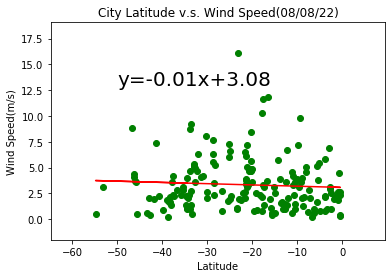

In [41]:
#base plot
WindSpeed=SouthHemi['Wind Speed']

#regression
(slope,intercept,rvalue,pvalue,stderr)=linregress(Lat_S,WindSpeed)
Line_eq='y='+str(round(slope,2))+'x+'+str(round(intercept,2))
regress_value=slope*Lat_S+intercept

#plot
plt.scatter(Lat_S,WindSpeed,facecolor='green')
plt.plot(Lat_S,regress_value,color='red',linewidth=1.5)
plt.annotate(Line_eq,xy=(-50,13),fontsize=20)
plt.title('City Latitude v.s. Wind Speed('+time+')')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(m/s)')
plt.xlim(min(Lat_S)-10,max(Lat_S)+10)
plt.ylim(-2,max(WindSpeed)+3);

In [42]:
print(f'The r-value is: {rvalue}')

The r-value is: -0.0643360796191496


In [43]:
#1.The r-value indicates that the correlation is none.
#2.It matches the conclusion from Latitude vs. Wind speed Plot.